# Scikit-learn model training and evaluation example

This notebook contains the code for two models predicting a binary outcome. This notebook is just meant as a first introduction towards the steps you go through when training models using scikit-learn. 

We start with importing the relevant modules. Next to importing numpy and pandas, which you have worked with by now, we need different funcionalities of scikit-learn (sklearn), related to preprocessing the data, the models we use, model selection and metrics used to evaluate model performance.

In [63]:
#import relevant modules
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

### Importing and describing the data

We work with a toy dataset, containing sonar data which can be used to classify objects as being either a Mine or a Rock. More information on the dataset can be found at: https://datahub.io/machine-learning/sonar.

In [64]:
df = pd.read_csv('https://datahub.io/machine-learning/sonar/r/sonar.csv')

In [65]:
# describing the dataframe - 1
df.head()

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,attribute_11,attribute_12,attribute_13,attribute_14,attribute_15,attribute_16,attribute_17,attribute_18,attribute_19,attribute_20,attribute_21,attribute_22,attribute_23,attribute_24,attribute_25,attribute_26,attribute_27,attribute_28,attribute_29,attribute_30,attribute_31,attribute_32,attribute_33,attribute_34,attribute_35,attribute_36,attribute_37,attribute_38,attribute_39,attribute_40,attribute_41,attribute_42,attribute_43,attribute_44,attribute_45,attribute_46,attribute_47,attribute_48,attribute_49,attribute_50,attribute_51,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,Rock
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,Rock
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,Rock
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,Rock
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,Rock


In [66]:
# describing the dataframe - 2
list(df.columns)

['attribute_1',
 'attribute_2',
 'attribute_3',
 'attribute_4',
 'attribute_5',
 'attribute_6',
 'attribute_7',
 'attribute_8',
 'attribute_9',
 'attribute_10',
 'attribute_11',
 'attribute_12',
 'attribute_13',
 'attribute_14',
 'attribute_15',
 'attribute_16',
 'attribute_17',
 'attribute_18',
 'attribute_19',
 'attribute_20',
 'attribute_21',
 'attribute_22',
 'attribute_23',
 'attribute_24',
 'attribute_25',
 'attribute_26',
 'attribute_27',
 'attribute_28',
 'attribute_29',
 'attribute_30',
 'attribute_31',
 'attribute_32',
 'attribute_33',
 'attribute_34',
 'attribute_35',
 'attribute_36',
 'attribute_37',
 'attribute_38',
 'attribute_39',
 'attribute_40',
 'attribute_41',
 'attribute_42',
 'attribute_43',
 'attribute_44',
 'attribute_45',
 'attribute_46',
 'attribute_47',
 'attribute_48',
 'attribute_49',
 'attribute_50',
 'attribute_51',
 'attribute_52',
 'attribute_53',
 'attribute_54',
 'attribute_55',
 'attribute_56',
 'attribute_57',
 'attribute_58',
 'attribute_59',
 'attr

In [67]:
# describing the dataframe - 3
df.describe()

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,attribute_11,attribute_12,attribute_13,attribute_14,attribute_15,attribute_16,attribute_17,attribute_18,attribute_19,attribute_20,attribute_21,attribute_22,attribute_23,attribute_24,attribute_25,attribute_26,attribute_27,attribute_28,attribute_29,attribute_30,attribute_31,attribute_32,attribute_33,attribute_34,attribute_35,attribute_36,attribute_37,attribute_38,attribute_39,attribute_40,attribute_41,attribute_42,attribute_43,attribute_44,attribute_45,attribute_46,attribute_47,attribute_48,attribute_49,attribute_50,attribute_51,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,0.236013,0.250221,0.273305,0.296568,0.320201,0.378487,0.415983,0.452318,0.504812,0.563047,0.609060,0.624275,0.646975,0.672654,0.675424,0.699866,0.702155,0.694024,0.642074,0.580928,0.504475,0.439040,0.417220,0.403233,0.392571,0.384848,0.363807,0.339657,0.325800,0.311207,0.289252,0.278293,0.246542,0.214075,0.197232,0.160631,0.122453,0.091424,0.051929,0.020424,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,0.132705,0.140072,0.140962,0.164474,0.205427,0.232650,0.263677,0.261529,0.257988,0.262653,0.257818,0.255883,0.250175,0.239116,0.244926,0.237228,0.245657,0.237189,0.240250,0.220749,0.213992,0.213237,0.206513,0.231242,0.259132,0.264121,0.239912,0.212973,0.199075,0.178662,0.171111,0.168728,0.138993,0.133291,0.151628,0.133938,0.086953,0.062417,0.035954,0.013665,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,0.028900,0.023600,0.018400,0.027300,0.003100,0.016200,0.034900,0.037500,0.049400,0.065600,0.051200,0.021900,0.056300,0.023900,0.024000,0.092100,0.048100,0.028400,0.014400,0.061300,0.048200,0.040400,0.047700,0.021200,0.022300,0.008000,0.035100,0.038300,0.037100,0.011700,0.036000,0.005600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,0.129250,0.133475,0.166125,0.175175,0.164625,0.196300,0.205850,0.242075,0.299075,0.350625,0.399725,0.406925,0.450225,0.540725,0.525800,0.544175,0.531900,0.534775,0.463700,0.411400,0.345550,0.281400,0.257875,0.217575,0.179375,0.154350,0.160100,0.174275,0.173975,0.186450,0.163100,0.158900,0.155200,0.126875,0.094475,0.068550,0.064250,0.045125,0.026350,0.011550,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,0.224800,0.249050,0.263950,0.281100,0.281700,0.304700,0.308400,0.368300,0.434950,0.542500,0.617700,0.664900,0.699700,0.698500,0.721100,0.754500,0.745600,0.731900,0.680800,0.607150,0.490350,0.429600,0.391200,0.351050,0.312750,0.321150,0.306300,0.312700,0.283500,0.278050,0.259500,0.245100,0.2

In [68]:
# describing the dataframe - 4
df.shape

(208, 61)

In [69]:
# exploring outcome data
df['Class'].value_counts()

Mine    111
Rock     97
Name: Class, dtype: int64

We split the data in a train and test set, while ensuring an equal distribution of the outcome variable in both sets.

In [70]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, test_index in split.split(df, df['Class']):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]

### Question 1
- Check whether splitting the data indeed resulted in 70% of the data being contained in the train set and 30% in the test set. 
- Check whether both datasets contain an equal distribution of mines vs. rocks.


In [71]:
# Answer Q1
print('share of observations in the train set:', str(round(len(strat_train_set)/len(df), 3)))
print('share of observations in the test set:', str(round(len(strat_test_set)/len(df), 3)))
print('share of mines in the train set:', str(round(len(strat_train_set.loc[strat_train_set['Class'] == 'Mine'])/len(strat_train_set), 3)))
print('share of mines in the test set:', str(round(len(strat_test_set.loc[strat_test_set['Class'] == 'Mine'])/len(strat_test_set), 3)))


share of observations in the train set: 0.697
share of observations in the test set: 0.303
share of mines in the train set: 0.531
share of mines in the test set: 0.54


We now split the features from the outcome data for both the train and the test set, to align with the input needed when using sklearn to train models.

In [72]:
# split features and outcome data
X_train = strat_train_set.loc[:,strat_train_set.columns != 'Class']
y_train = strat_train_set['Class']
X_test = strat_test_set.loc[:,strat_test_set.columns != 'Class']
y_test = strat_test_set['Class']



## Model 1: Logistic Regression

We start with running a basic logistic regression, which only requires two lines of code: 

In [73]:
log_clf = LogisticRegression(penalty='none', max_iter=1000)
log_clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000, penalty='none')

### Question 2
- look into the documentation for sklearn LogisticRegression to find out what the penalty and max_iter arguments stand for
- see what happens when you set max_iter to its default value

#### answer Q2
Documentation can be found at: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- the penalty parameter specifies whether ridge, lasso or elastic net penalization is applied, or whether there should be no penalty, as in our case. The max_iter argument specifies the maximum number of iterations taken when trying to converge to a solution.
- in case of penalty='none', the default of max_iter=100 results in a warning due to the model not having converged to an optimum. 

### Model evaluation 
We can now apply our model to the test set and compare predictions to actual outcomes.

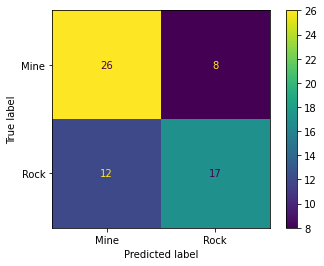

In [74]:
cm = confusion_matrix(y_test, log_clf.predict(X_test), labels=log_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_clf.classes_)
disp.plot()

In [75]:
accuracy_score(log_clf.predict(X_test), y_test)

0.6825396825396826

In [76]:
print('accuracy equals: ', str((26+17)/len(y_test)))

accuracy equals:  0.6825396825396826


### Question 3
use sklearn to determine precision and check the answer as was done above with accuracy

In [77]:
# Answer Q3
from sklearn.metrics import precision_score
precision_score(log_clf.predict(X_test), y_test, pos_label='Mine')

0.7647058823529411

In [78]:
# Answer Q3
print('precision equals: ', str((26)/(26+8)))

precision equals:  0.7647058823529411


### Question 4
- why were there no hyperparameters tuned in this model?
- how is the assessment of model performance in this example different from how you would normally do it at this stage of the process?

## Model 2: LASSO

Let's now train a LASSO model, which includes a penalty hyperparameter. We know from the inner workings of LASSO models that these models depend on the scale in which features are measured. We therefore start off with standardizing all features.

In [79]:
sc = StandardScaler()
X_train_prep = sc.fit_transform(X_train)
X_train_prep = pd.DataFrame(data = X_train_prep, columns = X_train.columns)
X_train_prep.head()

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,attribute_11,attribute_12,attribute_13,attribute_14,attribute_15,attribute_16,attribute_17,attribute_18,attribute_19,attribute_20,attribute_21,attribute_22,attribute_23,attribute_24,attribute_25,attribute_26,attribute_27,attribute_28,attribute_29,attribute_30,attribute_31,attribute_32,attribute_33,attribute_34,attribute_35,attribute_36,attribute_37,attribute_38,attribute_39,attribute_40,attribute_41,attribute_42,attribute_43,attribute_44,attribute_45,attribute_46,attribute_47,attribute_48,attribute_49,attribute_50,attribute_51,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60
0,0.034283,0.067601,-0.540083,-1.216550,-1.170987,-0.701419,-0.516137,-0.268162,-0.688366,-0.999476,-1.452884,-0.924677,-0.671054,-0.604662,-0.310763,-0.702617,-0.645532,-0.649335,-0.729284,-0.317455,-0.299591,-0.008835,0.131029,0.311613,0.712183,0.849213,1.234418,0.990376,0.336450,0.242650,0.499052,0.119935,-0.673320,-1.005238,-0.880116,-0.472645,-0.376587,-0.094161,-0.227435,-0.676225,-0.813205,-0.203893,-0.267677,-0.296704,-0.355767,-0.682982,-0.169889,-0.020404,-0.357189,-0.867054,-0.652782,-0.663675,-0.450920,-0.007605,-0.567176,0.293379,-0.654754,-0.351269,-0.475797,0.409389
1,1.858457,0.744916,1.373396,-0.358238,-0.523457,-0.436807,-0.715491,-0.240968,0.468459,-0.183085,0.374547,1.164771,0.629917,-0.636518,-0.257037,0.016645,0.500725,0.756393,0.350793,-0.337814,-1.158652,-1.704743,-1.792821,-2.119814,-1.763306,-1.824993,-1.582754,-0.814761,0.300458,0.757940,1.346200,1.664721,1.237655,1.244888,1.375219,1.686245,2.300661,3.170289,2.803381,2.246552,2.196068,1.719033,1.492587,1.048330,-0.343992,-0.310525,0.067050,0.417722,0.143261,0.217290,-0.202379,0.072554,1.193419,-0.903566,-0.777689,-0.962169,-0.960487,1.190439,0.430963,0.258869
2,-0.413156,-0.874452,-0.317661,-0.726481,0.165531,0.824675,-0.099744,-0.858148,-0.399998,-0.534576,-1.206989,-1.597307,-1.022537,-0.021406,1.047592,1.663665,1.408736,1.217317,1.329867,1.193420,1.298597,1.248310,1.178522,1.341047,1.214272,1.009183,1.000330,0.258084,-0.726925,-1.127596,-0.410590,0.107458,-0.071446,-0.454020,-0.570032,-0.939609,-0.460671,-0.552751,-0.793482,-0.899058,-1.218376,-1.316296,-1.160146,-0.691140,-0.554093,-0.760258,-0.902746,-0.796152,-0.805106,-1.531405,0.202221,-0.063067,-0.325504,-0.572750,-0.679450,-0.317875,-0.510879,-0.365677,-0.122315,-0.211507
3,0.181790,-0.884766,-0.405976,0.173362,0.072745,-0.125597,-0.363406,-0.373390,-0.640584,0.054246,0.543161,0.661013,0.176234,-0.973614,-1.020131,-1.032105,-0.926566,-0.833340,-1.183992,-1.302128,-1.148293,-0.131912,0.729596,0.943510,1.281299,1.269187,1.039683,1.339393,1.141080,0.730304,1.223526,1.265470,0.549450,-0.828538,-1.167940,-0.959243,-1.059660,-1.047394,-0.708022,-1.542171,-0.807474,-1.171051,-0.952890,-0.375005,-0.677426,-1.101387,-0.501603,0.507231,0.334040,-0.210338,-0.843631,-0.702424,-0.158283,0.364563,-0.398765,-0.350915,-0.780644,-0.682664,-0.291371,0.033088
4,0.403051,0.153555,-0.343828,-0.576969,0.191196,0.513465,-0.088490,-0.793119,-1.374078,-1.183483,-1.157810,0.031317,-0.877524,-1.048910,-1.025836,-0.975586,-1.099538,-1.250176,-1.285769,-1.795052,-1.627630,-2.421627,-1.663861,-1.761406,-2.686063,-2.175546,-0.865073,0.131535,0.234472,0.298369,0.932810,0.459575,1.182052,2.005991,2.186749,2.239056,1.780555,1.618582,1.636097,2.054182,1.755938,1.295830,0.917346,0.052361,-0.325399,-0.599440,-0.486175,-0.282651,0.110082,-0.240883,-0.790193,-0.411807,0.775367,0.709164,-0.146149,-0.235273,1.035773,-0.178367,-0.045470,0.051904


And we can now train a LASSO model, simply by changing the penalty argument in the LogisticRegression. Moreover, we now have a hyperparameter, which means that we define a grid with a large range of possible hyperparameter values. As model results need to be compared for different settings of the hyperparameter, we now need to introduce cross-validation as well, to generate feedback from our training data while not using the test data.

Please note how the hyperparameter values are stored in a dictionary under the name 'C', which is because 'C' is the argument containing the penalty (inverse strenght of regularization) in LogisticRegression (always make sure to refer to the documentation when working with sklearn models: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)


In [80]:
logL1_clf = LogisticRegression(penalty='l1', solver='liblinear')
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
lasso_alphas = np.linspace(0.1, 20, 200)
grid = dict()
grid['C'] = lasso_alphas
gscv = GridSearchCV(logL1_clf, grid, scoring='accuracy', cv = cv, n_jobs=-1)
results = gscv.fit(X_train_prep, y_train)

We now have 200 model outcomes. To find out what the settings are of the best model, we simply use best_estimator_

In [81]:
results.best_estimator_

LogisticRegression(C=1.7, penalty='l1', solver='liblinear')

We can plot model results for the entire range of hyperparameter values considered.

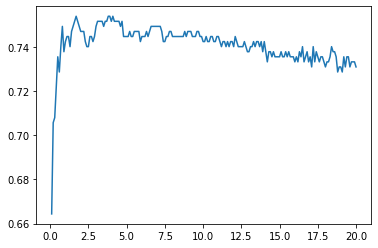

In [82]:
# plot accuracy for different values of C
import matplotlib.pyplot as plt
plt.plot(lasso_alphas, results.cv_results_ ['mean_test_score'])

One of the defining features of the LASSO is that it pushes out features that do not contribute enough to the prediction of the outcome Y. We can see which features were pushed out of the model by using the code below.

In [83]:
# get coefficients
results.best_estimator_.coef_

array([[-0.10684101,  0.        ,  0.36576579, -0.60456154,  0.        ,
         0.45273564,  0.        ,  1.84873431, -1.5060859 , -0.13204619,
        -0.49723919, -1.13442938, -0.02246386,  0.        ,  0.        ,
         0.        ,  1.83043525, -0.96597467,  0.        , -0.34990475,
         0.        , -0.9450799 ,  0.        , -0.62065038,  0.        ,
         0.54471692,  0.        , -0.03237877, -0.56781719, -0.5657299 ,
         2.02766672, -1.03550252,  0.        ,  0.56358841, -0.27003689,
         0.        ,  1.11700252,  0.        , -0.83034573,  0.40645625,
         0.        ,  0.06172128, -0.22389613, -0.19437113, -0.37414539,
         0.        ,  0.        , -0.90088226, -1.17803099,  0.59565913,
        -0.39705303, -0.56993645, -0.3557674 , -0.73119247,  0.64843256,
        -0.48145581,  0.24432691, -0.4834518 ,  0.        ,  0.07291729]])

### Question 5
How many features were pushed out of the model by LASSO's built-in feature selection?

In [84]:
# answer Q5
(results.best_estimator_.coef_==0).sum()

18

Finally, we can check the performance of our best LASSO model on the test set. This requires us to prepare the test features exactly like we prepared our training features. 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


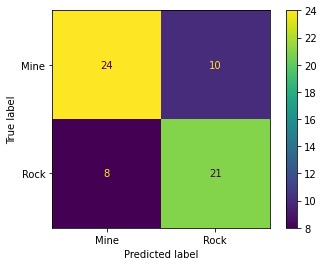

In [85]:
X_test_prep = sc.transform(X_test)
cm = confusion_matrix(y_test, results.best_estimator_.predict(X_test_prep), labels=results.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=results.classes_)
disp.plot()

### Question 6
- Why do we use sc.transform instead of sc.fit_transform to prepare the test data?
- What should be added to the code to get rid of the UserWarning that is shown with the confusion matrix above?

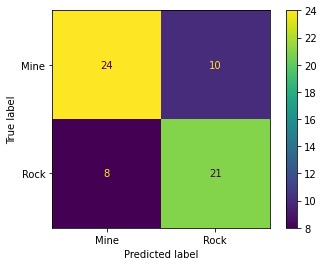

In [86]:
# answer Q6
X_test_prep = sc.transform(X_test)
X_test_prep = pd.DataFrame(data = X_test_prep, columns = X_test.columns)
cm = confusion_matrix(y_test, results.best_estimator_.predict(X_test_prep), labels=results.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=results.classes_)
disp.plot()

In [87]:
accuracy_score(results.predict(X_test_prep), y_test)

0.7142857142857143

### Bonus Question 7
Train and evaluate a Random Forest model

In [88]:
# Answer Q7
from sklearn.ensemble import RandomForestClassifier

RF_clf = RandomForestClassifier()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
max_feat = np.linspace(1, len(X_train.columns), len(X_train.columns)).astype(int)
grid = dict()
grid['max_features'] = max_feat
gscv_rf = GridSearchCV(RF_clf, grid, scoring='accuracy', cv = cv, n_jobs=-1)
results_rf = gscv_rf.fit(X_train, y_train)

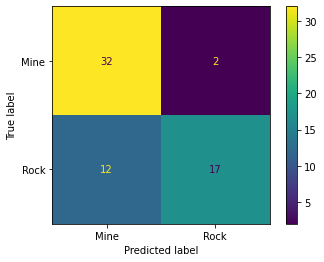

In [89]:
# Answer Q7
cm = confusion_matrix(y_test, results_rf.best_estimator_.predict(X_test), labels=results_rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=results_rf.classes_)
disp.plot()

In [90]:
# Answer Q7
accuracy_score(results_rf.predict(X_test), y_test)

0.7777777777777778